<a href="https://colab.research.google.com/github/adrita23/Machine-Learning-Assignments/blob/main/ML_Fall_21_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Fall 2021
#ML 633: Machine Learning
#Homework: 1 
#Date: 22-09-2021
#Author: Adrita Anika

In [2]:
#Question 1 

## part a: Data Exploration

### a.i: Using the training data, compute the number of samples belonging to each class.  Are the classes equally distributed?


Question 1: part a


*   Mounting Drive
*   Importing Data



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/content/drive/MyDrive/ML HW/data_train.csv', header=None) 

In [6]:
data.head()


,0,1,2,3
0,38,66,0,1
1,38,66,11,1
2,38,60,1,1
3,38,67,5,1
4,39,66,0,2


In [7]:
#a.i : compute the number of samples belonging to each class
no_of_samples = data.loc[:,3].value_counts()

print("The number of samples for class- 1 is ", no_of_samples[1])
print("The number of samples for class- 2 is ", no_of_samples[2])

The number of samples for class- 1 is  173
The number of samples for class- 2 is  72


a.i : The classes are not equally distributed

Text(0.5, 1.0, 'Number of positive axillary lymph nodes')

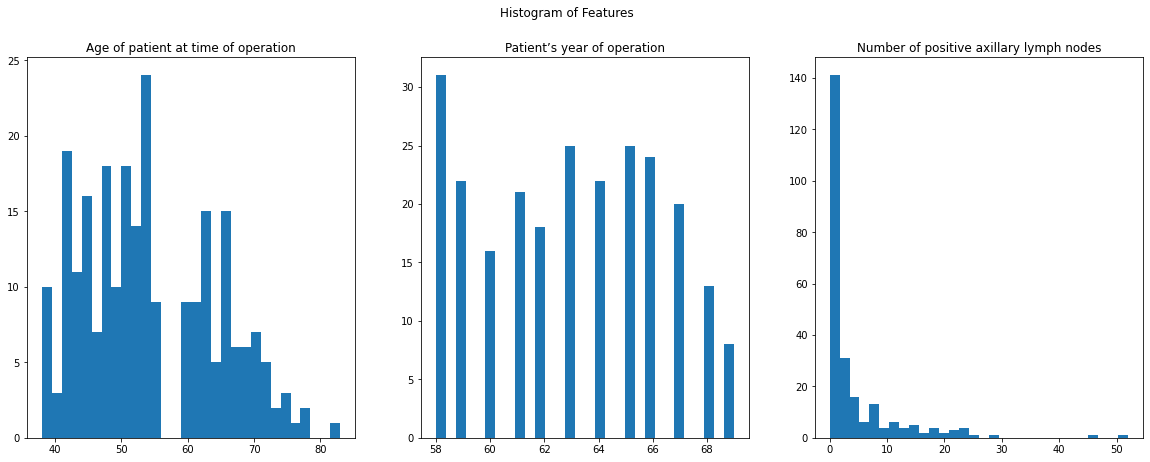

In [8]:
#a.ii : plot the histogram of eachfeature (i.e.,  3 total histograms).

fig, axs = plt.subplots(1,3, figsize =(20, 7))
fig.suptitle('Histogram of Features')

feature_1 = axs[0].hist(data.loc[:,0], bins= 30)
axs[0].set_title("Age of patient at time of operation")
feature_2 = axs[1].hist(data.loc[:,1], bins= 30)
axs[1].set_title('Patient’s year of operation')
feature_3 = axs[2].hist(data.loc[:,2], bins= 30)
axs[2].set_title('Number of positive axillary lymph nodes')

a.ii. 
1.  Age of patient at time of operation has multimodal distrubution
2.  Patient’s year of operation has uniform/ unimodal??
3.  Number of positive axillary lymph nodes detected has unimodal distribution

Text(0, 0.5, 'Number of positive axillary lymph nodes')

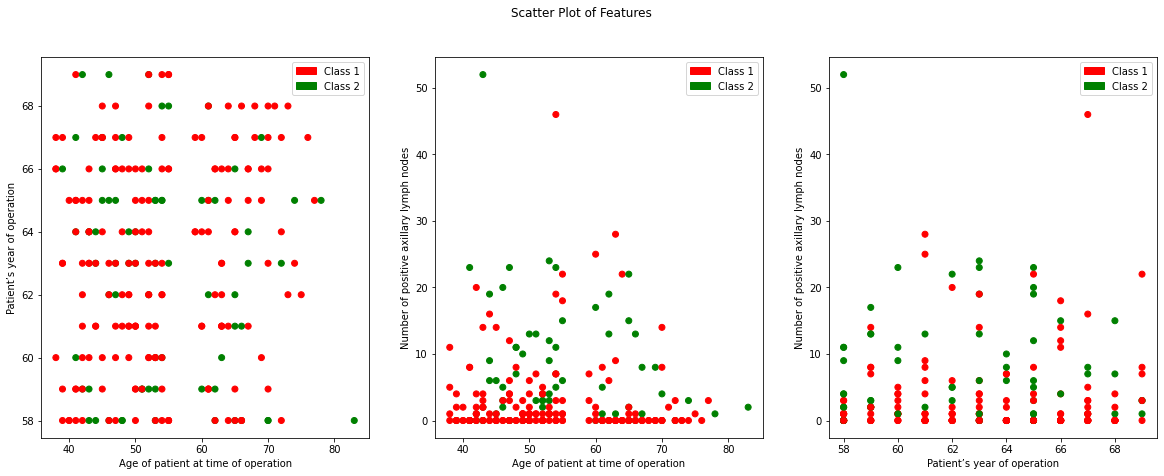

In [9]:
#a.iii
'''
data_num = data.loc[:,3].to_numpy
idx_1 = np.where(data.loc[:,3]==1)
idx_2 = np.where(data.loc[:,3] ==2)
'''
import matplotlib.patches as mpatches
fig, ax = plt.subplots(1,3, figsize= (20,7)) 
fig.suptitle('Scatter Plot of Features')
colors = {1: 'red', 2: 'green'}

ax[0].scatter(data.loc[:,0], data.loc[:, 1], c = data.loc[:,3].map(colors))
pop_a = mpatches.Patch(color='red', label='Class 1')
pop_b = mpatches.Patch(color='green', label='Class 2')
ax[0].legend(handles=[pop_a,pop_b])
#ax[0].set_title('damped')
ax[0].set_xlabel('Age of patient at time of operation')
ax[0].set_ylabel('Patient’s year of operation')

ax[1].scatter(data.loc[:,0], data.loc[:, 2], c = data.loc[:,3].map(colors))
ax[1].legend(handles=[pop_a,pop_b])
ax[1].set_xlabel('Age of patient at time of operation')
ax[1].set_ylabel('Number of positive axillary lymph nodes')

ax[2].scatter(data.loc[:,1], data.loc[:, 2], c = data.loc[:,3].map(colors))
ax[2].legend(handles=[pop_a,pop_b])
ax[2].set_xlabel('Patient’s year of operation')
ax[2].set_ylabel('Number of positive axillary lymph nodes')






In [10]:
#Question 1.b

In [11]:
data.shape

(245, 4)

In [12]:
#1b.i
#Implementing KNN 

class KNN_classifier:

  def __init__(self, K, distance = 'l2'):
    self.K = K
    self.distance = 'l2'

  def fit(self, X_train, Y_train):
    self.X_train = X_train
    self.Y_train = Y_train

  def predict(self, test_sample):
    train_data_np = self.X_train.to_numpy()

    if self.distance == 'l1':
      distance_np = np.sum(abs(train_data_np - test_sample), axis = 1)
    else:
      distance_np = np.sum((train_data_np - test_sample)**2, axis = 1)
    #distance_np = eucledean_distance_from_sample(test_sample)

    train_label_np = self.Y_train.to_numpy()
    sort_index = np.argsort(distance_np)
    k_votes_index = sort_index[0:self.K]
    k_votes_labels = train_label_np[k_votes_index]
    labels_unique, labels_counts = np.unique(k_votes_labels, return_counts = True)
    classified_label_index = np.argsort(labels_counts)
    return labels_unique[classified_label_index[-1]]

In [13]:
#1b.ii
# distinguish fetaures and labels from training data

data_train = data.loc[:,0:2]
label_train = data.loc[:,3]

#import dev data and seperate features and labels
data1= pd.read_csv('/content/drive/MyDrive/ML HW/data_dev.csv', header=None) 
data_dev_ = data1.loc[:,0:2].to_numpy()
label_dev_ = data1.loc[:,3].to_numpy()

#count number of samples for each class
no_of_dev_data= data_dev_.shape[0]
no_of_dev_data_class1 = np.count_nonzero(label_dev_ == 1)
no_of_dev_data_class2 = np.count_nonzero(label_dev_==2)

#diffrent values of K
k_values = np.array([1,3,5,7,9,11,13])
Acc = np.empty(len(k_values))
BAcc = np.empty(len(k_values))

#hyperparameter tuning on dev data
for i, k in enumerate(k_values):
  my_classifier = KNN_classifier(k)
  my_classifier.fit(data_train, label_train)
  correct_classified = 0
  correct_classified_class1 = 0
  correct_classified_class_2 = 0

  for indeX, dataX in enumerate(data_dev_):
    res = my_classifier.predict(dataX)
    if res == label_dev_[indeX]:
      correct_classified +=1
      if res == 1:
        correct_classified_class1 += 1
      else:
        correct_classified_class_2 += 1

  Acc[i]  = correct_classified/no_of_dev_data
  BAcc[i] = 0.5 * (correct_classified_class1/ no_of_dev_data_class1) + 0.5 * (correct_classified_class_2/ no_of_dev_data_class2)

  k_star1 = k_values[np.argmax(np.array(Acc))]
  k_star2 = k_values[np.argmax(np.array(BAcc))]

print(f"The value for K* that gives highest Acc is: {k_star1}")
print(f"The value for K** that gives highest BAcc is: {k_star2}")

The value for K* that gives highest Acc is: 5
The value for K** that gives highest BAcc is: 5


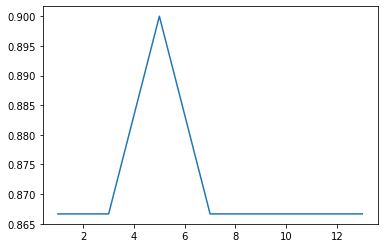

In [14]:
plt.plot(k_values, Acc)

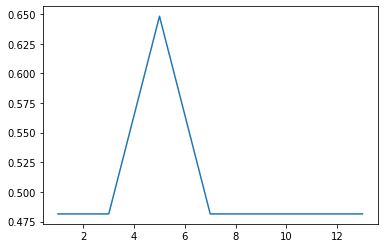

In [15]:
plt.plot(k_values, BAcc)

In [16]:
#1b.iii
# distinguish fetaures and labels from training data

#import test data and seperate features and labels
data2= pd.read_csv('/content/drive/MyDrive/ML HW/data_test.csv', header=None) 
data_test_ = data2.loc[:,0:2].to_numpy()
label_test_ = data2.loc[:,3].to_numpy()

no_of_test_data= data_test_.shape[0]
no_of_test_data_class1 = np.count_nonzero(label_test_ == 1)
no_of_test_data_class2 = np.count_nonzero(label_test_==2)


#different values of K
k_vals = np.array([k_star1, k_star2])
Acc_test = np.empty(len(k_vals))
BAcc_test = np.empty(len(k_vals))

#hyperparameter tuning on dev data
for i, k in enumerate(k_vals):
  my_classifier = KNN_classifier(k)
  my_classifier.fit(data_train, label_train)
  correct_classified_test = 0
  correct_classified_test_class1 = 0
  correct_classified_test_class_2 = 0

  for indeX, dataX in enumerate(data_test_):
    res = my_classifier.predict(dataX)
    if res == label_test_[indeX]:
      correct_classified_test +=1
      if res == 1:
        correct_classified_test_class1 += 1
      else:
        correct_classified_test_class_2 += 1

  Acc_test[i]  = correct_classified_test/no_of_test_data
  BAcc_test[i] = 0.5 * (correct_classified_test_class1/ no_of_test_data_class1) + 0.5 * (correct_classified_test_class_2/ no_of_test_data_class2)
print(f"The value for Acc with K* and K** on the testing set are respectively: {Acc_test}")
print(f"The value for BAcc with K* and K** on the testing set are respectively: {BAcc_test}")

The value for Acc with K* and K** on the testing set are respectively: [0.83870968 0.83870968]
The value for BAcc with K* and K** on the testing set are respectively: [0.64666667 0.64666667]


With l1 norm or Manhattan distance, the Acc are [0.87096774 0.87096774 0.83870968 0.87096774] for K = [1, 3, 5, 7] respectively.
With l1 norm or Manhattan distance, the BAcc are [0.73       0.66666667 0.64666667 0.73      ] for K = [1, 3, 5, 7] respectively.


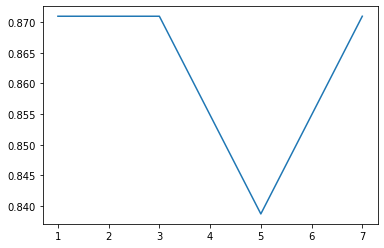

In [17]:
#1b.iv
kk = [1,3,5,7]
Acc_test = np.empty(len(kk))
BAcc_test = np.empty(len(kk))

#hyperparameter tuning on dev data
for i, k in enumerate(kk):
  my_classifier = KNN_classifier(k, distance='l1')
  my_classifier.fit(data_train, label_train)
  correct_classified_test = 0
  correct_classified_test_class1 = 0
  correct_classified_test_class_2 = 0

  for indeX, dataX in enumerate(data_test_):
    res = my_classifier.predict(dataX)
    if res == label_test_[indeX]:
      correct_classified_test +=1
      if res == 1:
        correct_classified_test_class1 += 1
      else:
        correct_classified_test_class_2 += 1

  Acc_test[i]  = correct_classified_test/no_of_test_data
  BAcc_test[i] = 0.5 * (correct_classified_test_class1/ no_of_test_data_class1) + 0.5 * (correct_classified_test_class_2/ no_of_test_data_class2)
print(f"With l1 norm or Manhattan distance, the Acc are {Acc_test} for K = {kk} respectively.")
print(f"With l1 norm or Manhattan distance, the BAcc are {BAcc_test} for K = {kk} respectively.")
plt.plot(kk, Acc_test)

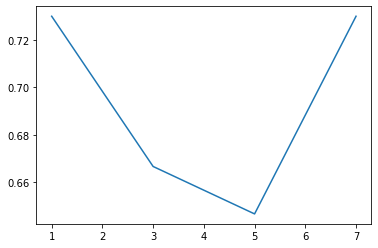

In [18]:
plt.plot(kk, BAcc_test)

1c: ML Deployment